**summarize:**
- To Do: implement time function
- To Do: different penalty paramters


In [ ]:
# Code Sheet for Assignment 1, Intelligent Systems; Milena and Paula

In [5]:
!pip install pygad


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.4 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
import json as json
import pygad as pygad

In [71]:
# loads data from dataset: capacity, min_reviews_max_reviews, preference matrix, friendship matrix, authorship matrix
def load_dataset_variables(source):

  with open(source,'r') as f:
    data = json.load(f)

  capacity  = data['reviewer_capacity']
  min_reviews_per_paper = data['min_reviews_per_paper']
  max_reviews_per_paper = data['max_reviews_per_paper']

  preference = pd.DataFrame(data['preferences']) # matrix
  preference.index = [f"Reviewer {i+1}" for i in range(len(preference))] # pretty matrix
  preference.columns = [f"Paper {i+1}" for i in range(preference.shape[1])]

  friend = pd.DataFrame(data['friendships'])
  friend.index = [f"Reviewer {i+1}" for i in range(len(friend))]
  friend.columns = [f"Rev {i+1}" for i in range(friend.shape[1])]

  author = pd.DataFrame(data['authorship'])
  author.index = [f"Reviewer {i+1}" for i in range(len(author))]
  author.columns = [f"Paper {i+1}" for i in range(author.shape[1])]


  return capacity, min_reviews_per_paper, max_reviews_per_paper, preference, friend, author

capacity, min_reviews_per_paper, max_reviews_per_paper, pref1, friend1, author1  = load_dataset_variables('hard_dataset_2.json')

print("capacity : ", capacity, '\n'
      "min_reviews_per_paper: ", min_reviews_per_paper, '\n'
      "max_reviews_per_paper: ", max_reviews_per_paper, '\n''\n'
      "preference matrix: ", '\n' , pref1, '\n''\n'
      "friendship matrix: ", '\n', friend1.shape,friend1, '\n''\n',
      "author matrix: ", '\n', author1)



capacity :  8 
min_reviews_per_paper:  3 
max_reviews_per_paper:  5 

preference matrix:  
              Paper 1  Paper 2  Paper 3  Paper 4  Paper 5  Paper 6  Paper 7  \
Reviewer 1         0        5        1        5        0        5        1   
Reviewer 2         4        1        2        2        3        1        4   
Reviewer 3         0        0        4        0        5        4        2   
Reviewer 4         4        1        5        5        3        1        0   
Reviewer 5         5        1        2        1        0        0        3   
Reviewer 6         0        3        3        2        3        1        0   
Reviewer 7         5        4        3        4        0        1        4   
Reviewer 8         5        3        0        1        1        0        5   
Reviewer 9         4        3        1        2        1        3        3   
Reviewer 10        4        1        3        5        4        0        0   
Reviewer 11        0        1        5        4   

In [72]:
# Helper function for ga_instance
# creates initial population.
def population_function(size, population_size=10):
  rand_population_matrix =[np.random.choice([0, 1], size=size.shape).flatten() for _ in range(population_size)]
  return rand_population_matrix

population = population_function(author1)
for i, matrix in enumerate(population, start=1):
    print(f"\nMatrix {i}:\n{matrix}")


Matrix 1:
[1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0
 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0
 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1]

Matrix 2:
[1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1
 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0
 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1
 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1
 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0]

M

In [75]:
best_matrices_all_datasets = []

In [88]:
# this is the ga instance
chosen_pop_size = 10
rand_population_matrix = population_function(author1, chosen_pop_size)



def fitness_func(ga_instance, solution, solution_idx):
  d = fit_func_p(solution)
  #print(d)
  return d


# create random population with pygad library
ga_instance = pygad.GA(fitness_func = fitness_func,
                       initial_population = rand_population_matrix,
                       num_generations = 200,
                       num_parents_mating = 5,
                       sol_per_pop = chosen_pop_size,
                       num_genes = 10, #
                       crossover_type = crossover_func, #chceck
                       mutation_type = new_mutation)
                       #crossover_function = crossover_custom)



ga_instance.run()
best_sol, _, _ = ga_instance.best_solution()
best_matrices_all_datasets.append(best_sol.reshape(author1.shape))

#print(best_sol, _, _)
#print("FINAL RESULT: ", '\n', best_sol.reshape(author1.shape))
final_result = best_sol.reshape(author1.shape)

# Convert the array into a Pandas DataFrame for pretty printing
df = pd.DataFrame(best_sol.reshape(author1.shape),
                  columns=[f"Paper {i}" for i in range(final_result.shape[1])],
                  index=[f"Reviewer {i}" for i in range(final_result.shape[0])])

print("FINAL RESULT:")
print(df.to_string(index=True))


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


FINAL RESULT:
             Paper 0  Paper 1  Paper 2  Paper 3  Paper 4  Paper 5  Paper 6  Paper 7  Paper 8  Paper 9  Paper 10  Paper 11  Paper 12  Paper 13  Paper 14  Paper 15  Paper 16  Paper 17  Paper 18  Paper 19
Reviewer 0       1.0      1.0      1.0      1.0      1.0      1.0      1.0      0.0      1.0      0.0       0.0       1.0       0.0       1.0       1.0       0.0       0.0       0.0       1.0       0.0
Reviewer 1       0.0      0.0      0.0      0.0      1.0      1.0      1.0      0.0      0.0      1.0       1.0       0.0       0.0       1.0       1.0       0.0       0.0       0.0       0.0       0.0
Reviewer 2       0.0      1.0      1.0      0.0      0.0      1.0      1.0      0.0      0.0      1.0       1.0       0.0       1.0       1.0       0.0       0.0       0.0       0.0       0.0       1.0
Reviewer 3       0.0      1.0      0.0      1.0      0.0      1.0      0.0      0.0      1.0      1.0       0.0       1.0       1.0       1.0       0.0       0.0       1.0       

In [95]:
best_matrices_all_datasets

[array([[1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
         1., 0., 1., 0.],
        [1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0.],
        [1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
         1., 1., 1., 1.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
         1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
         0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
         0., 0., 1., 1.],
        [0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
         1., 0., 0., 1.],
        [0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
         1., 0., 1., 0.],
        [0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
         0., 1., 1., 0.],
        [1

In [102]:
import json

# best_matrixes = [matrix.tolist() for matrix in best_matrices_all_datasets]
# with open('best_matrixes.json', 'w') as f:
#     json.dump(best_matrixes, f)


In [86]:
# own fitness function

preference_matrix = pref1.to_numpy()
friend = friend1.to_numpy()
print("friend shape",friend.shape)
author = author1.to_numpy()
print(author1.shape)
capacity = capacity
min_reviews = min_reviews_per_paper
max_reviews = max_reviews_per_paper

def fit_func_p(solution):
        friend2 = friend1.to_numpy()
        author2 = author1.to_numpy()
        preference_matrix2 = pref1.to_numpy()

        list_total_fitness_score = []

        #for m in population:  # iterate over population matrices, called "m"
        m = solution.reshape(author1.shape)


        result_matrix = np.zeros(author1.shape)  # create matrix with 0
        fitness_score = 0  # base-score: 0
        penalty = 0  # reset penalty for each matrix


        for i in range(m.shape[0]):  # iterate over rows (reviewers)
            amount_of_reviews = np.sum(m[i, :])  # reviews assigned to this reviewer

            for j in range(m.shape[1]):  # iterate over columns (papers)
                assigned_reviews = np.sum(m[:, j])  # reviews assigned to this paper

                if m[i, j] == 1: # if reviewer is assigned to the paper
                  authors_of_paper = np.where(author2[:, j] == 1)[0]


                  if i in authors_of_paper:
                    result_matrix[i,j] = 0  # large penalty for reviewing own paper
                    penalty += 5000
                  else:
                    if np.all(friend2[i, authors_of_paper] == 0):  # if reviewer is not a friend
                      result_matrix[i, j] = 100  # score = 100
                    else:
                      result_matrix[i, j] = 60  # if reviewer is a friend, score = 60

                if assigned_reviews > capacity:  # over capacity
                  penalty += 500


            if amount_of_reviews < min_reviews or amount_of_reviews > max_reviews:
                penalty += 1000  # penalty for reviewer exceeding review limits

        dot_product = np.sum(result_matrix * preference_matrix2)  # Compute dot product
        total_fitness_score = dot_product - penalty  # Final fitness score
        list_total_fitness_score.append(total_fitness_score)

        return list_total_fitness_score

fit = fit_func_p(population)
for i, matrix in enumerate(fit):
    print(f"Matrix {i + 1}:")
    print(matrix)

friend shape (12, 12)
(12, 20)


AttributeError: 'list' object has no attribute 'reshape'

In [12]:
author_matrix = author1
friend_matrix = friend1
preference = pref1
capacity = capacity
min_reviews = min_reviews_per_paper
max_reviews = max_reviews_per_paper

# crossover function, copied from the PyGad Documentation. Is good to use, because
# it satisfies the needs of this ga algorithm: choosing new parents.
# constraints are taken care in fitness func and mutation func, so simple mating of parents
# is enough
def crossover_func(parents, offspring_size, ga_instance):
  offspring = []
  idx = 0
  while len(offspring) != offspring_size[0]:
        parent1 = parents[idx % parents.shape[0], :].copy()
        parent2 = parents[(idx + 1) % parents.shape[0], :].copy()

        random_split_point = np.random.choice(range(offspring_size[1]))

        parent1[random_split_point:] = parent2[random_split_point:]

        offspring.append(parent1)

        idx += 1

  return np.array(offspring)

In [13]:
# own mutation functions.
# goal: ensuring that reviewer for paper is not author of the paper

def new_mutation(offspring, ga_instance):
  flattend_author = author1.to_numpy().flatten()
  modified_offspring = np.empty((0, len(offspring[0])), dtype=int)  # Initialize an empty NumPy array with the correct shape
  for m in offspring:
        new_m = m.copy()
        for idx, value in enumerate(m):  # Use enumerate to get both index and value
            if value == 1:
                if flattend_author[idx] == 1:
                    new_m[idx] = 0
                else:
                    continue
        modified_offspring = np.append(modified_offspring, [new_m], axis=0)
  return offspring

In [114]:
time_tab = []

In [115]:
import time

#we measure the time with the time.time() function
start_time = time.time()

ga_instance.run()

end_time = time.time()

execution_time = end_time - start_time

print(f"Time taken to run the GA: {execution_time:.4f} seconds")

time_tab.append(execution_time)

Time taken to run the GA: 0.7372 seconds


In [60]:
time_tab

[0.5045714378356934,
 0.5091209411621094,
 0.9627408981323242,
 0.54248046875,
 0.5975055694580078,
 0.7006180286407471,
 0.8670470714569092,
 0.9841132164001465]

In [117]:
mean = np.mean(time_tab)
mean

0.7372257709503174

In [ ]:
time_table = []

In [118]:
time_table.append(mean)
print(time_table)

[0.5045714378356934, 0.5091209411621094, 0.9627408981323242, 0.54248046875, 0.5975055694580078, 0.7006180286407471, 0.8670470714569092, 0.9841132164001465, 0.7372257709503174]


In [63]:
# df_time=pd.DataFrame(time_table)
# df_time.to_csv('time_table.csv', index=False)

In [66]:
saved_time=pd.read_csv('time_table.csv')
saved_time

,0
0,0.504571
1,0.509121
2,0.962741
3,0.542480
4,0.597506
5,0.700618
6,0.867047
7,0.984113


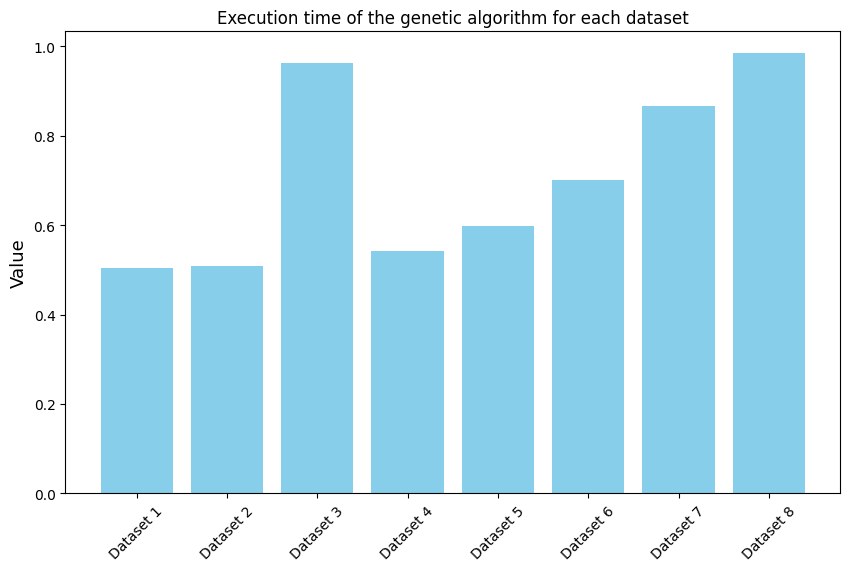

In [70]:
import matplotlib.pyplot as plt

#we are changing data frame to list again
saved_time1 = saved_time.iloc[:, 0].tolist()

plt.figure(figsize=(10, 6))

plt.bar(range(len(saved_time1)), saved_time1, color='skyblue')

plt.xticks(range(len(saved_time1)), [f'Dataset {i+1}' for i in range(len(saved_time1))], rotation=45)
plt.xticks

plt.title('Execution time of the genetic algorithm for each dataset')
plt.ylabel('Value', size=13)


plt.show()

In [103]:
import json

with open('best_matrixes.json', 'r') as f:
    saved_matrices = json.load(f)

print(saved_matrices)

[[[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0,

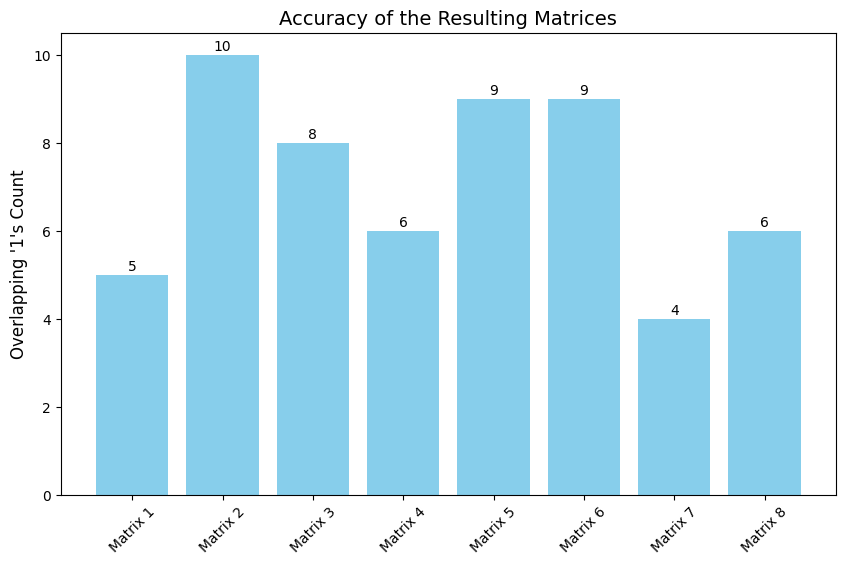

In [108]:
import numpy as np

test_matrixes = saved_matrices

def check_forbidden_overlap(author, result_matrices):
    author = author.values

    overlap_results = []

    for idx, result in enumerate(result_matrices):
        result = np.array(result)

        forbidden_overlap = np.logical_and(author == 1, result == 1).sum()

        overlap_results.append(forbidden_overlap)

    return overlap_results

overlap_results = check_forbidden_overlap(author1, test_matrixes)


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(overlap_results) + 1), overlap_results, color='skyblue')

plt.ylabel("Overlapping '1's Count", fontsize=12)
plt.title("Accuracy of the Resulting Matrices", fontsize=14)

for i, v in enumerate(overlap_results):
    plt.text(i + 1, v + 0.1, str(v), ha='center', fontsize=10)

plt.xticks(range(1, len(overlap_results) + 1), [f'Matrix {i+1}' for i in range(len(overlap_results))], rotation=45)

plt.show()
plt.show()


The above analysis was done based on one dataset, 'hard_dataset_2.json', and it shows how accurate the result matrices are with different parameters and crossover functions. Every two subsequent matrices were calculated with the same penalty values; the only difference was the crossover function. Then, the parameters were changed, and the process was redone